<a href="https://colab.research.google.com/github/LiquidRonnie/Project-2/blob/main/FbProphet_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
from google.colab import files
uploaded = files.upload()

Saving Fort Pulaski, GA.csv to Fort Pulaski, GA (4).csv


In [162]:
# import numpy, pandas for data manipulation
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [163]:
weather_data = pd.read_csv('Fort Pulaski, GA.csv',parse_dates=['date'])
weather_data

,Station_ID,date,Monthly_MSL,Monthly_Avg_Temp
0,"Pulaski, GA",1979-01-01,-0.229,45.3
1,"Pulaski, GA",1979-02-01,-0.079,46.8
2,"Pulaski, GA",1979-03-01,-0.135,57.3
3,"Pulaski, GA",1979-04-01,-0.072,64.9
4,"Pulaski, GA",1979-05-01,-0.108,72.4
...,...,...,...,...
503,"Pulaski, GA",2021-02-01,0.200,50.7
504,"Pulaski, GA",2021-03-01,0.219,51.5
505,"Pulaski, GA",2021-04-01,0.164,60.5
506,"Pulaski, GA",2021-05-01,0.102,65.0


In [ ]:
# Check Dataset shape
print(weather_data.shape)

# select the data and temperature columns
temp_df = weather_data[['date', 'Monthly_Avg_Temp']]

# rename column for fbprophet
temp_df = temp_df.rename(columns={'date':'ds','Monthly_Avg_Temp':'y'})

temp_df.head(10)

(508, 4)


,ds,y
0,1979-01-01,45.3
1,1979-02-01,46.8
2,1979-03-01,57.3
3,1979-04-01,64.9
4,1979-05-01,72.4
5,1979-06-01,75.8
6,1979-07-01,81.9
7,1979-08-01,81.4
8,1979-09-01,76.5
9,1979-10-01,65.9


In [ ]:
temp_df['ds'] = pd.to_datetime(temp_df['ds'])
temp_df

,ds,y
0,1979-01-01,45.3
1,1979-02-01,46.8
2,1979-03-01,57.3
3,1979-04-01,64.9
4,1979-05-01,72.4
...,...,...
503,2021-02-01,50.7
504,2021-03-01,51.5
505,2021-04-01,60.5
506,2021-05-01,65.0


In [ ]:
# select the subset datea from 2015 - 2019
# mask = (temp_df['ds'] >= '2018-01-01') & (temp_df['ds'] <= '2021-05-04')
# temp_df = temp_df.loc[mask]

# iunpect first 5 rows and loast 5 rows of the data
from IPython.display import display
display(temp_df.head(5))
display(temp_df.tail(5))

,ds,y
0,1979-01-01,45.3
1,1979-02-01,46.8
2,1979-03-01,57.3
3,1979-04-01,64.9
4,1979-05-01,72.4


,ds,y
503,2021-02-01,50.7
504,2021-03-01,51.5
505,2021-04-01,60.5
506,2021-05-01,65.0
507,2021-06-01,71.6


In [ ]:
# describe
temp_df.describe()

,y
count,508.000000
mean,66.275591
std,11.995079
min,42.600000
25%,55.475000
50%,66.000000
75%,78.150000
max,86.200000


In [ ]:
# Output the max and min temps
print(temp_df.loc[temp_df['y'] == temp_df['y'].max()])
print(temp_df.loc[temp_df['y'] == temp_df['y'].min()])

            ds     y
448 2016-07-01  86.2
            ds     y
72  1985-01-01  42.6
263 2000-12-01  42.6


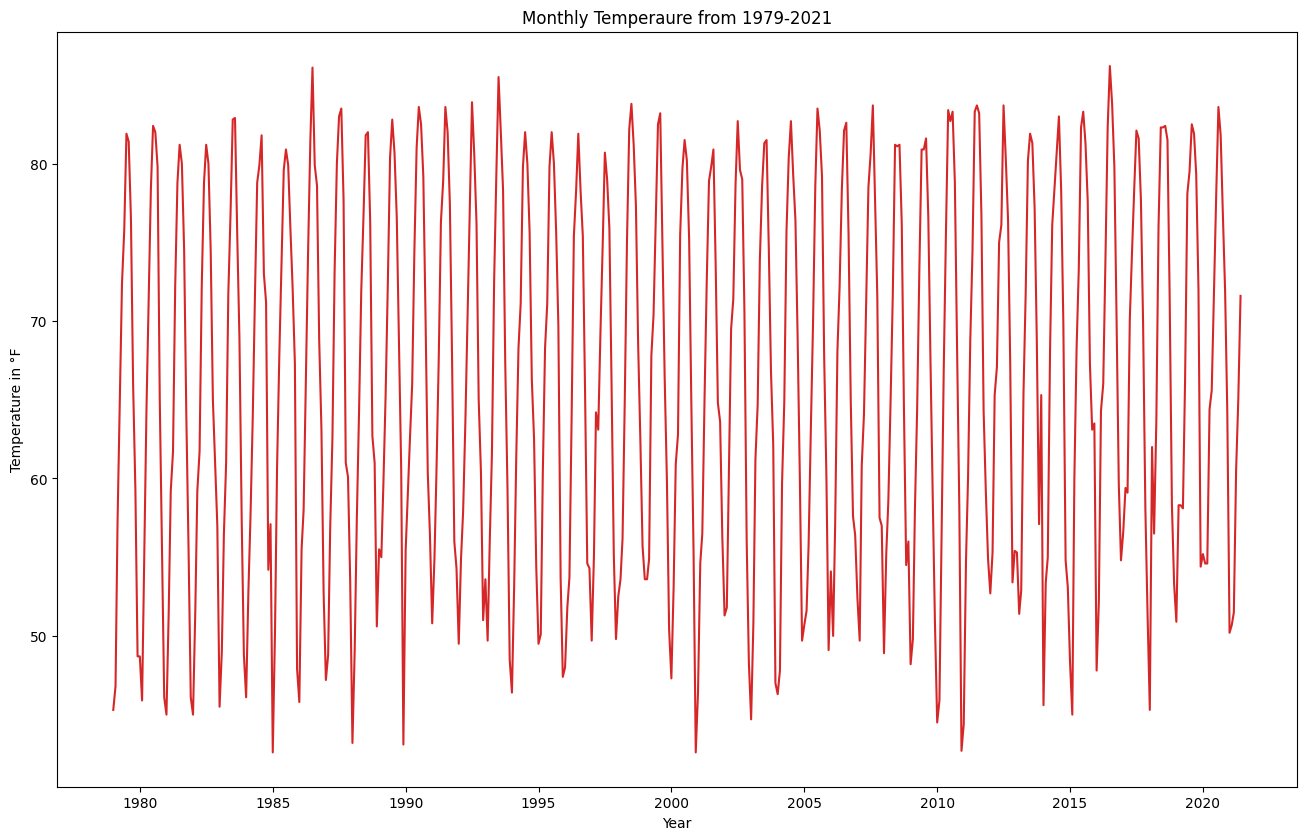

In [ ]:
# plot the monthly temperature change
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_df.ds, temp_df.y, color='tab:red')
plt.gca().set(title='Monthly Temperaure from 1979-2021', xlabel='Year', ylabel='Temperature in °F')
plt.show()

In [ ]:
# import Prophet
from fbprophet import Prophet

In [ ]:
# Initialize Model
model = Prophet(seasonality_mode='multiplicative', mcmc_samples=200)
model.fit(temp_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['yearly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [ ]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=120, freq='MS')

In [ ]:
future_dates.tail()

,ds
623,2031-02-01
624,2031-03-01
625,2031-04-01
626,2031-05-01
627,2031-06-01


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
#prediction.head()

In [ ]:
#prediction.tail()

In [ ]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
623,2031-02-01,53.507187,48.489514,58.005783
624,2031-03-01,59.936343,55.034678,64.691755
625,2031-04-01,67.076228,62.211792,71.605393
626,2031-05-01,74.092496,68.560364,79.019006
627,2031-06-01,81.105766,76.152455,86.119853


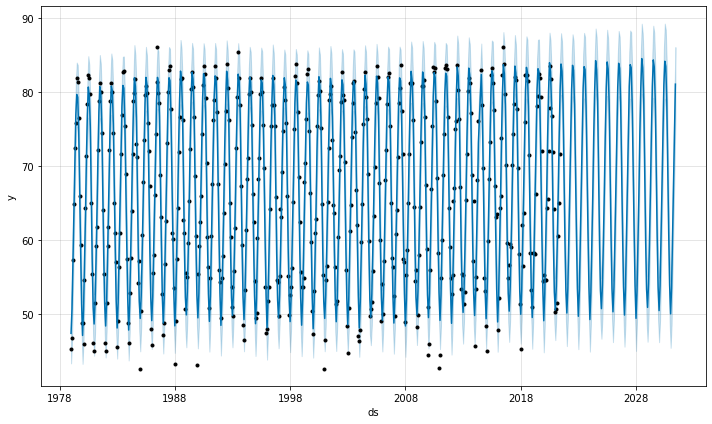

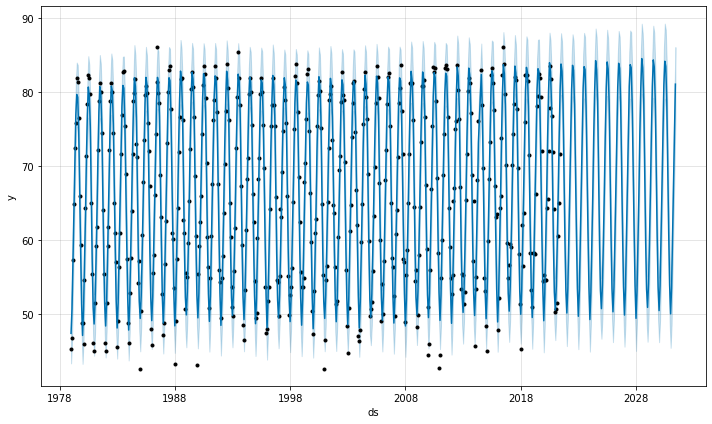

In [ ]:
### plot the predicted projection
model.plot(prediction)
plt.gca().set(title='Past, Present, and Future Temperature', xlabel='Year', ylabel='Temperature in °F')

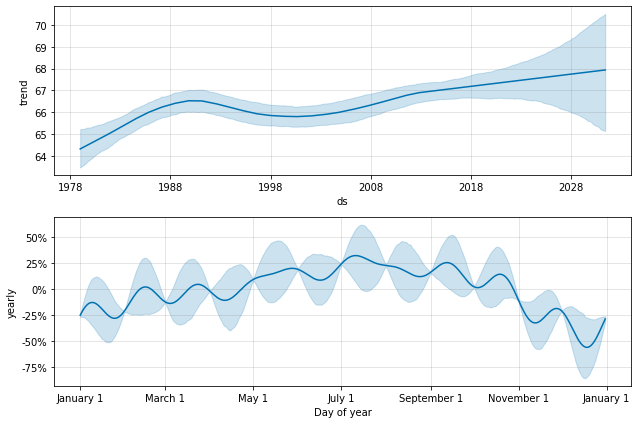

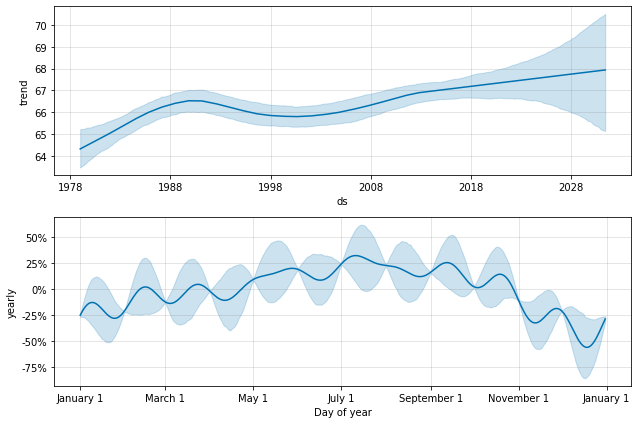

In [ ]:
# plot trend, yearly seasonality of the time series. 
model.plot_components(prediction)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

### plot the predicted projection - interactive

plot_plotly(model, prediction)



In [ ]:
# plot trend, yearly seasonality of the time series. - interactiveb

plot_components_plotly(model, prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
# Creat cross validation

cutoffs = pd.date_range(start='2018-01-01', end='2020-01-01', freq='3MS')

cross_val = cross_validation(model, horizon='90 days', cutoffs=cutoffs)
cross_val.head()

  0%|          | 0/9 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-01,53.499875,49.950435,57.400412,62.0,2018-01-01
1,2018-03-01,60.198097,56.364689,63.728660,56.5,2018-01-01
2,2018-04-01,67.474138,63.826753,71.000198,63.7,2018-01-01
3,2018-05-01,74.761051,71.141824,78.516042,76.0,2018-04-01
4,2018-06-01,81.376678,77.834910,84.995328,82.3,2018-04-01


In [ ]:
# obtain performance metrics
from fbprophet.diagnostics import performance_metrics
p_metrics = performance_metrics(cross_val)
p_metrics.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,37.087208,6.089927,4.880913,0.072426,0.072426,0.500000
1,31 days,33.117743,5.754802,4.317656,0.066333,0.039704,0.571429
2,59 days,8.966711,2.994447,2.880734,0.050423,0.050423,1.000000
3,60 days,20.035863,4.476144,4.228961,0.076284,0.083800,0.500000
4,61 days,3.278596,1.810689,1.321832,0.018111,0.010327,1.000000


Coverage = the difference between the yhat_lower and yhat_upper


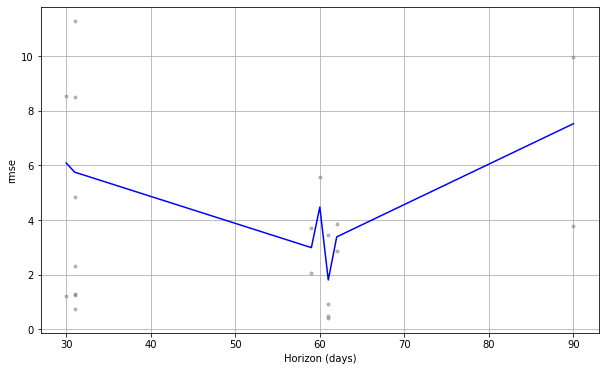

In [ ]:
# plot RMSE graph

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cross_val, metric='rmse')


In [ ]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('weather_prophet_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model

# with open('serialized_model.json', 'r') as fin:
#     m = model_from_json(json.load(fin))  # Load model